<img src="https://qstom-it.com/wp-content/uploads/2019/04/logo.png"/>

<h1 align="center">Analyse de l'évolution du Coronavirus 2019</h1>

    Dernière mise à jour : 5 mars 2020

Afin de mieux comprendre l'évolution de l'épidémie de coronavirus qui nous frappe actuellement, nous nous sommes procuré les données relatives à son évolution recensée jour par jour depuis le 22/01/2020 à travers le monde.  


<b>Dans cet article, nous ne nous essaierons pas en la réalisation d'une prédiction sur son évolution</b>, mais nous réaliserons une simple analyse des données qui nous permettra d'apprécier la réalité des faits de cette épidémie.

## Import des données

In [318]:
import pandas as pnd
datas = pnd.read_csv('datas/covid_19_datas.csv')

In [319]:
#Nombre d'observations et de caractéristiques
datas.shape

(3395, 8)

## Première analyse et préparation des données

In [320]:
#Informations sur le nom des colonnes
datas.columns

Index(['SNo', 'ObservationDate', 'Province/State', 'Country/Region',
       'Last Update', 'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

In [321]:
#Affichage des 5 premières observations
datas.head(5)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [322]:
#Affichage des 5 dernières observations
datas.tail(5)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
3390,3391,03/04/2020,NaN,Ukraine,2020-03-03T15:33:02,1.0,0.0,0.0
3391,3392,03/04/2020,From Diamond Princess,Australia,2020-02-29T02:03:10,0.0,0.0,0.0
3392,3393,03/04/2020,"Lackland, TX (From Diamond Princess)",US,2020-02-24T23:33:02,0.0,0.0,0.0
3393,3394,03/04/2020,"Omaha, NE (From Diamond Princess)",US,2020-02-24T23:33:02,0.0,0.0,0.0
3394,3395,03/04/2020,"Travis, CA (From Diamond Princess)",US,2020-02-24T23:33:02,0.0,0.0,0.0


In [323]:
#Informations sur les types de caractéristiques dont nous disposons
datas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3395 entries, 0 to 3394
Data columns (total 8 columns):
SNo                3395 non-null int64
ObservationDate    3395 non-null object
Province/State     2264 non-null object
Country/Region     3395 non-null object
Last Update        3395 non-null object
Confirmed          3395 non-null float64
Deaths             3395 non-null float64
Recovered          3395 non-null float64
dtypes: float64(3), int64(1), object(4)
memory usage: 212.3+ KB


In [324]:
#On renomme certaines caracteristiques pour une facilité de manipulation ultérieure
datas = datas.rename(columns={"ObservationDate": "Date", "Province/State": "ProvinceState","Country/Region":"Country","Last Update":"LastUpdate"})

In [329]:
#Combien de données manquantes ?
datas.isnull().sum()

SNo                 0
Date                0
ProvinceState    1131
Country             0
LastUpdate          0
Confirmed           0
Deaths              0
Recovered           0
dtype: int64

Certaines observations ne semblent pas posséder d'informations concernant la province ou l'état ce qui paraît logique car tous les pays n'ont pas de province ou d'état

In [330]:
#Conversion de la feature Date au format Date
datas['Date']= pnd.to_datetime(datas['Date']) 

In [331]:
#Type de caractéristiques
datas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3395 entries, 0 to 3394
Data columns (total 8 columns):
SNo              3395 non-null int64
Date             3395 non-null datetime64[ns]
ProvinceState    2264 non-null object
Country          3395 non-null object
LastUpdate       3395 non-null object
Confirmed        3395 non-null float64
Deaths           3395 non-null float64
Recovered        3395 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 212.3+ KB


In [332]:
#Liste des pays
datas["Country"].unique()

array(['Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'US', 'Japan',
       'Thailand', 'South Korea', 'Singapore', 'Philippines', 'Malaysia',
       'Vietnam', 'Australia', 'Mexico', 'Brazil', 'Colombia', 'France',
       'Nepal', 'Canada', 'Cambodia', 'Sri Lanka', 'Ivory Coast',
       'Germany', 'Finland', 'United Arab Emirates', 'India', 'Italy',
       'UK', 'Russia', 'Sweden', 'Spain', 'Belgium', 'Others', 'Egypt',
       'Iran', 'Israel', 'Lebanon', 'Iraq', 'Oman', 'Afghanistan',
       'Bahrain', 'Kuwait', 'Austria', 'Algeria', 'Croatia',
       'Switzerland', 'Pakistan', 'Georgia', 'Greece', 'North Macedonia',
       'Norway', 'Romania', 'Denmark', 'Estonia', 'Netherlands',
       'San Marino', ' Azerbaijan', 'Belarus', 'Iceland', 'Lithuania',
       'New Zealand', 'Nigeria', 'North Ireland', 'Ireland', 'Luxembourg',
       'Monaco', 'Qatar', 'Ecuador', 'Azerbaijan', 'Czech Republic',
       'Armenia', 'Dominican Republic', 'Indonesia', 'Portugal',
       'Andorra', 'Latvia

In [333]:
#On renomme le pays "Mainland China" en "China"
datas = datas.replace('Mainland China', 'China')

## Exploration des données

In [334]:
#Date minimale des observations
datas["Date"].min()

Timestamp('2020-01-22 00:00:00')

In [335]:
#Date maximale des observations
datas["Date"].max()

Timestamp('2020-03-04 00:00:00')

In [336]:
#Pour connaitre le nombre de cas à la date maximale l'erreur serait de faire la somme de la colonne Confirmed, car il s'agit
#d'une donnée cumulée chaque jour !
#Il faut donc extraire les données à la date souhaitée et de réaliser ensuite les différents calculs

#On extrait les données à la derniere date la plus récente
datasDerniereDate = datas[datas['Date'] == max(datas['Date'])].reset_index()

In [337]:
#Frequence des relevés (on constate un relevé journalier)
datas["Date"].unique()

array(['2020-01-22T00:00:00.000000000', '2020-01-23T00:00:00.000000000',
       '2020-01-24T00:00:00.000000000', '2020-01-25T00:00:00.000000000',
       '2020-01-26T00:00:00.000000000', '2020-01-27T00:00:00.000000000',
       '2020-01-28T00:00:00.000000000', '2020-01-29T00:00:00.000000000',
       '2020-01-30T00:00:00.000000000', '2020-01-31T00:00:00.000000000',
       '2020-02-01T00:00:00.000000000', '2020-02-02T00:00:00.000000000',
       '2020-02-03T00:00:00.000000000', '2020-02-04T00:00:00.000000000',
       '2020-02-05T00:00:00.000000000', '2020-02-06T00:00:00.000000000',
       '2020-02-07T00:00:00.000000000', '2020-02-08T00:00:00.000000000',
       '2020-02-09T00:00:00.000000000', '2020-02-10T00:00:00.000000000',
       '2020-02-11T00:00:00.000000000', '2020-02-12T00:00:00.000000000',
       '2020-02-13T00:00:00.000000000', '2020-02-14T00:00:00.000000000',
       '2020-02-15T00:00:00.000000000', '2020-02-16T00:00:00.000000000',
       '2020-02-17T00:00:00.000000000', '2020-02-18

### Informations au niveau mondial

In [338]:
#MONDIAL = Combien de cas : confirmés ? décédés ? Guerris ?
confirmes = datasDerniereDate["Confirmed"].sum()
decedes = datasDerniereDate["Deaths"].sum()
guerris = datasDerniereDate["Recovered"].sum()

print("NIVEAU MONDIAL EN DATE DU : "+max(datas['Date']).strftime("%d/%m/%Y"))
print("  Confirmes : "+str(confirmes))
print("  Decedes : "+str(decedes))
print("  Gueris : "+str(guerris))
print("  Taux mortalité (%): "+str(round((decedes/confirmes)*100,2)))


NIVEAU MONDIAL EN DATE DU : 04/03/2020
  Confirmes : 95124.0
  Decedes : 3254.0
  Gueris : 51171.0
  Taux mortalité (%): 3.42


### En Chine

In [339]:
#Date de début de l'épidémie en Chine
datasChine = datas[datas['Country'] == 'China'].reset_index()
dateDebutChine = min(datasChine['Date'])
dateDebutChine

Timestamp('2020-01-22 00:00:00')

In [340]:
#En Chine
datasChine = datasDerniereDate[datasDerniereDate['Country']=="China"].reset_index()

confirmes = datasChine["Confirmed"].sum()
decedes = datasChine["Deaths"].sum()
guerris = datasChine["Recovered"].sum()

print("EN CHINE EN DATE DU : "+max(datas['Date']).strftime("%d/%m/%Y"))
print("  Confirmes : "+str(confirmes))
print("  Decedes : "+str(decedes))
print("  Gueris : "+str(guerris))
print("  Taux mortalité (%): "+str(round((decedes/confirmes)*100,2)))

EN CHINE EN DATE DU : 04/03/2020
  Confirmes : 80271.0
  Decedes : 2981.0
  Gueris : 49955.0
  Taux mortalité (%): 3.71


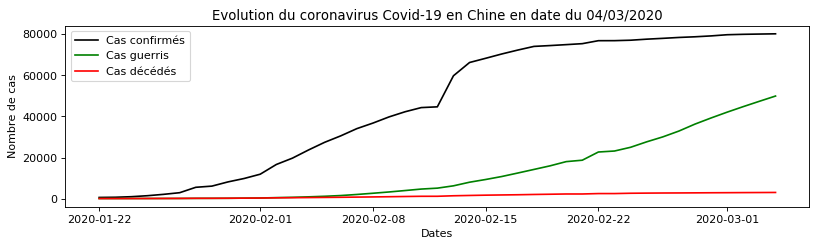

In [341]:
#Chronogramme de l'évolution de l'épidémie en chine

#Représentation des différents cas
#La courbe de mortalité semble plate, mais cela est dû à un nombre peu élevé de mortalité par rapport aux autres valeures ()

#Groupement par date en réalisant la somme de chaque feature
datasEvolutionChine = datas[datas['Country'] == 'China'].reset_index()
datasEvolutionChine = datasEvolutionChine.groupby('Date')['Confirmed', 'Deaths', 'Recovered'].sum().reset_index()

import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

from matplotlib.pyplot import figure
figure(num=None, figsize=(12, 3), dpi=80, facecolor='w', edgecolor='k')

plt.plot(datasEvolutionChine['Date'],datasEvolutionChine['Confirmed'],color='black',label='Cas confirmés')
plt.plot(datasEvolutionChine['Date'],datasEvolutionChine['Recovered'],color='green',label='Cas guerris')
plt.plot(datasEvolutionChine['Date'],datasEvolutionChine['Deaths'],color='red',label='Cas décédés')
plt.title('Evolution du coronavirus Covid-19 en Chine en date du '+max(datas['Date']).strftime("%d/%m/%Y"))
plt.ylabel('Nombre de cas')
plt.xlabel('Dates')
plt.legend()
plt.show()


### En France

In [342]:
#Date de début de l'épidémie en France
datasFrance = datas[datas['Country'] == 'France'].reset_index()
dateDebutFrance = min(datasFrance['Date'])
dateDebutFrance

Timestamp('2020-01-24 00:00:00')

In [343]:
#En France
datasFrance = datasDerniereDate[datasDerniereDate['Country']=="France"].reset_index()

confirmes = datasFrance["Confirmed"].sum()
decedes = datasFrance["Deaths"].sum()
guerris = datasFrance["Recovered"].sum()

print("EN FRANCE EN DATE DU : "+max(datas['Date']).strftime("%d/%m/%Y"))
print("  Confirmes : "+str(confirmes))
print("  Decedes : "+str(decedes))
print("  Gueris : "+str(guerris))
print("  Taux mortalité (%): "+str(round((decedes/confirmes)*100,2)))

EN FRANCE EN DATE DU : 04/03/2020
  Confirmes : 285.0
  Decedes : 4.0
  Gueris : 12.0
  Taux mortalité (%): 1.4


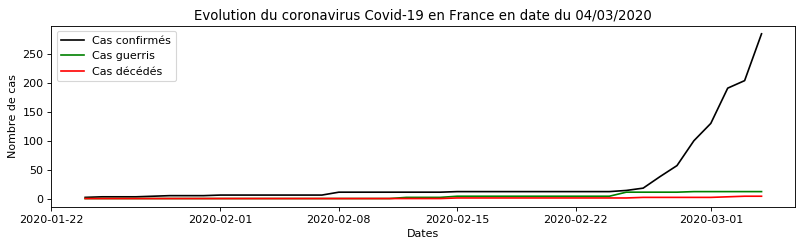

In [344]:
#Chronogramme de l'évolution de l'épidémie en France
#Représentation des différents cas

#Groupement par date en réalisant la somme de chaque feature
datasEvolutionFrance = datas[datas['Country'] == 'France'].reset_index()
datasEvolutionFrance = datasEvolutionFrance.groupby('Date')['Confirmed', 'Deaths', 'Recovered'].sum().reset_index()

import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

from matplotlib.pyplot import figure
figure(num=None, figsize=(12, 3), dpi=80, facecolor='w', edgecolor='k')

plt.plot(datasEvolutionFrance['Date'],datasEvolutionFrance['Confirmed'],color='black',label='Cas confirmés')
plt.plot(datasEvolutionFrance['Date'],datasEvolutionFrance['Recovered'],color='green',label='Cas guerris')
plt.plot(datasEvolutionFrance['Date'],datasEvolutionFrance['Deaths'],color='red',label='Cas décédés')
plt.title('Evolution du coronavirus Covid-19 en France en date du '+max(datas['Date']).strftime("%d/%m/%Y"))
plt.ylabel('Nombre de cas')
plt.xlabel('Dates')
plt.legend()
plt.show()

### En Italie

In [345]:
#Date de début de l'épidémie en Italie
datasItalie = datas[datas['Country'] == 'Italy'].reset_index()
dateDebutItaly = min(datasItalie['Date'])
dateDebutItaly

Timestamp('2020-01-31 00:00:00')

In [346]:
#En Italie
datasItalie = datasDerniereDate[datasDerniereDate['Country']=="Italy"].reset_index()

confirmes = datasItalie["Confirmed"].sum()
decedes = datasItalie["Deaths"].sum()
guerris = datasItalie["Recovered"].sum()

print("EN ITALIE EN DATE DU : "+max(datas['Date']).strftime("%d/%m/%Y"))
print("  Confirmes : "+str(confirmes))
print("  Decedes : "+str(decedes))
print("  Gueris : "+str(guerris))
print("  Taux mortalité (%): "+str(round((decedes/confirmes)*100,2)))

EN ITALIE EN DATE DU : 04/03/2020
  Confirmes : 3089.0
  Decedes : 107.0
  Gueris : 276.0
  Taux mortalité (%): 3.46


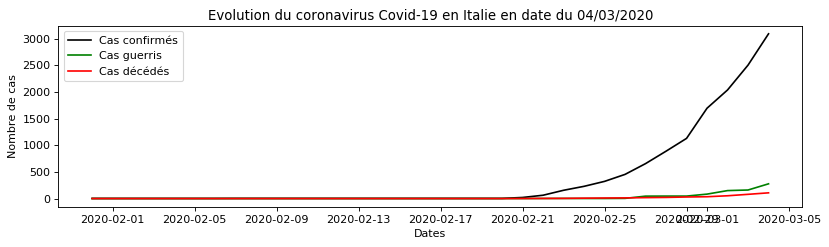

In [347]:
#Chronogramme de l'évolution de l'épidémie en Italie

#Groupement par date en réalisant la somme de chaque feature
datasEvolutionItalie = datas[datas['Country'] == 'Italy'].reset_index()
datasEvolutionItalie = datasEvolutionItalie.groupby('Date')['Confirmed', 'Deaths', 'Recovered'].sum().reset_index()

import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

from matplotlib.pyplot import figure
figure(num=None, figsize=(12, 3), dpi=80, facecolor='w', edgecolor='k')

plt.plot(datasEvolutionItalie['Date'],datasEvolutionItalie['Confirmed'],color='black',label='Cas confirmés')
plt.plot(datasEvolutionItalie['Date'],datasEvolutionItalie['Recovered'],color='green',label='Cas guerris')
plt.plot(datasEvolutionItalie['Date'],datasEvolutionItalie['Deaths'],color='red',label='Cas décédés')
plt.title('Evolution du coronavirus Covid-19 en Italie en date du '+max(datas['Date']).strftime("%d/%m/%Y"))
plt.ylabel('Nombre de cas')
plt.xlabel('Dates')
plt.legend()
plt.show()

# Superposition des courbes d'évolutions par pays sur une période donnée

## Cas confirmés

In [348]:
min(datas['Date'])

Timestamp('2020-01-22 00:00:00')

In [349]:
#Date de début d'accroissement de l'épidémie pour chaque pays (obtenues via observations des données)
#22/01/2020 pour la Chine passage (début des relevés)
#25/02/2020 pour la France de 18 cas à 38 cas
#21/02/2020 pour l'Italie de 3 cas à  20 cas
import datetime

#Création des dates de début
dateDebutChine = datetime.datetime(2020, 1, 22)
dateDebutFrance = datetime.datetime(2020, 2, 25)
dateDebutItalie = datetime.datetime(2020 ,2, 21)

#Comme la France a démarrée aprés la chine et l'italie, on calcul le nombre de jours d'observations en France
nbjoursObservationsFrance = (max(datas['Date'])-dateDebutFrance).days

#Calcul des dates de fin
dateFinFrance = dateDebutFrance + datetime.timedelta(days=nbjoursObservationsFrance)
dateFinChine = dateDebutChine + datetime.timedelta(days=nbjoursObservationsFrance)
dateFinItalie = dateDebutItalie + datetime.timedelta(days=nbjoursObservationsFrance)



In [350]:
#Extraction des données en Chine
datasChine = datas[datas['Country'] == 'China'].reset_index()
datasChine['Date'] = pnd.to_datetime(datasChine['Date']) 
filtre = (datasChine['Date'] > dateDebutChine) & (datasChine['Date'] <= dateFinChine)
datasChine = datasChine.loc[filtre]
datasEvolutionChine = datasChine.groupby('Date')['Confirmed', 'Deaths', 'Recovered'].sum().reset_index()

#Extraction des données en Italie
datasItalie = datas[datas['Country'] == 'Italy'].reset_index()
datasItalie['Date'] = pnd.to_datetime(datasItalie['Date']) 
filtre = (datasItalie['Date'] > dateDebutItalie) & (datasItalie['Date'] <= dateFinItalie)
datasItalie = datasItalie.loc[filtre]
datasEvolutionItalie = datasItalie.groupby('Date')['Confirmed', 'Deaths', 'Recovered'].sum().reset_index()


#Extraction des données en France
datasFrance = datas[datas['Country'] == 'France'].reset_index()
datasFrance['Date'] = pnd.to_datetime(datasFrance['Date']) 
filtre = (datasFrance['Date'] > dateDebutFrance) & (datasFrance['Date'] <= dateFinFrance)
datasFrance = datasFrance.loc[filtre]
datasEvolutionFrance = datasFrance.groupby('Date')['Confirmed', 'Deaths', 'Recovered'].sum().reset_index()


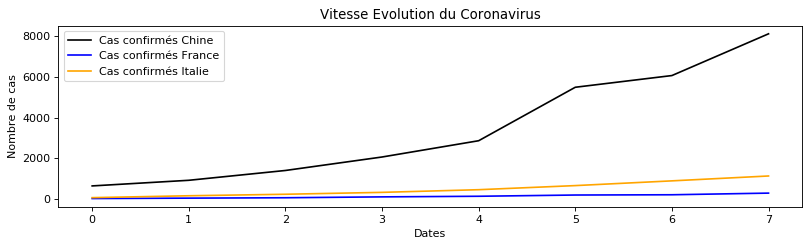

In [351]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(12, 3), dpi=80, facecolor='w', edgecolor='k')

#Creation d'un tableau comportant le nombre de jours pour l'affichage sur le graphique
jours = [i for i in range(nbjoursObservationsFrance)]

plt.plot(jours,datasEvolutionChine['Confirmed'],color='black',label='Cas confirmés Chine')
plt.plot(jours,datasEvolutionFrance['Confirmed'],color='blue',label='Cas confirmés France')
plt.plot(jours,datasEvolutionItalie['Confirmed'],color='orange',label='Cas confirmés Italie')

plt.title('Vitesse Evolution du Coronavirus')
plt.ylabel('Nombre de cas')
plt.xlabel('Dates')
plt.legend()
plt.show()


On constate une évolution plus rapide du coronavirus en Italie qu'en France sur une même période de jours. Le jour de la date de départ a été choisie comme suit :  
- 22/01/2020 Pour la Chine (date de début de l'épidémie)  
- 25/02/2020 pour la France passant de 18 cas à 38 cas
- 21/02/2020 pour l'Italie passant de 3 cas à  20 cas 


## Décès

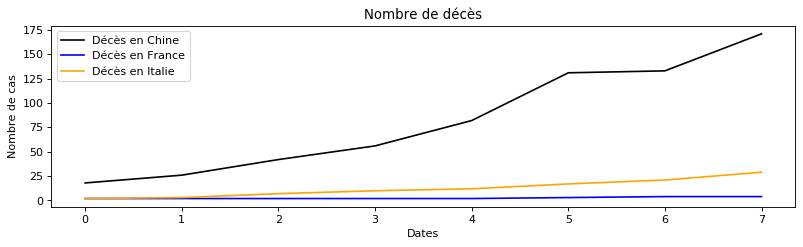

In [354]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(12, 3), dpi=80, facecolor='w', edgecolor='k')

#Creation d'un tableau comportant le nombre de jours pour l'affichage sur le graphique
jours = [i for i in range(nbjoursObservationsFrance)]

plt.plot(jours,datasEvolutionChine['Deaths'],color='black',label='Décès en Chine')
plt.plot(jours,datasEvolutionFrance['Deaths'],color='blue',label='Décès en France')
plt.plot(jours,datasEvolutionItalie['Deaths'],color='orange',label='Décès en Italie')

plt.title('Nombre de décès')
plt.ylabel('Nombre de cas')
plt.xlabel('Dates')
plt.legend()
plt.show()

# Conclusion en date du 05/03

En date du 5 mars 2020, nous pouvons considérer que la France est entrée en phase épidémique avec une augmentation du nombre de cas significative.  
Cependant son évolution est moins rapide que celle de l'Italie et encore moins que celle de la chine sur une même période.    
On constate également un nombre moins important de décés sur la même période entre la France et l'Italie  
A ce jour, le taux de mortalité en France est 1,4 %  inférieur à ceux de la Chine (3.71 %) et de l'Italie (3.44%)  

